In [ ]:
# vector_fields.py contains a bunch of tools to visualize vector fields and related objects
# this line is mainly needed to run the notebook in google colab or kaggle
!wget https://raw.githubusercontent.com/JeremiasE/worksheets-ode-2023/main/tools/vector_fields.py

In [1]:
import sympy
from sympy import sin
from sympy.utilities import lambdify

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

import ipywidgets as widgets
from IPython.display import Video

import vector_fields 


# Das mathematische Pendel

In [2]:
(t,x,y) = sympy.var("t x y")

Das mathematische Pendel lässt sich durch die Differentialgleichung zweiter Ordnung

\begin{align*}\ddot x = -k\sin(x)\end{align*}

beschreiben. Der Parameter $k$ ist dabei gegeben durch $k= \frac{g}{\ell}$, wobei $\ell$ die Länge des Pendels und $g$
die Fallbeschleunigung ist. Im Folgenden werden wir $k$ in der Regel auf $1$ setzen.

Lösungen dieser Differentialgleichung sind Funktionen der Form $I \to \mathbb{R}$ für ein Intervall $I$. 


In [3]:
k = 1
f = sympy.Matrix([y, -k*sin(x)])

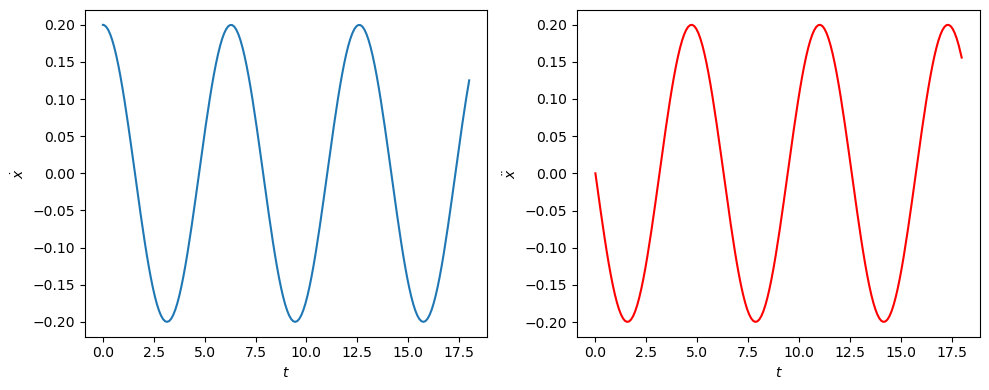

In [4]:
initial_value = (0.2,0)
fig = vector_fields.plot_solution_pair(f,(x,y));
fig.set_figwidth(10)
fig.set_figheight(4)
fig.axes[0].set_xlabel("$t$")
fig.axes[1].set_xlabel("$t$")
fig.axes[0].set_ylabel("$\dot x$")
fig.axes[1].set_ylabel("$\ddot x$")
fig.tight_layout()
plt.show()

## Differentialgleichungssystem und Vektorfeld

Setzen wir $y=\dot x$, so erhalten wir
das 2-dimensionale Differentialgleichungssystem
\begin{align*}\dot x &= y,\\ \dot y &= -k\sin(x).\end{align*}

Die Abbildung $\mathbb{R} \mapsto \mathbb{R},\; \begin{pmatrix}x \\ y\end{pmatrix} \mapsto \begin{pmatrix} y \\ -k\sin(x)\end{pmatrix}$ definiert ein Vektorfeld.

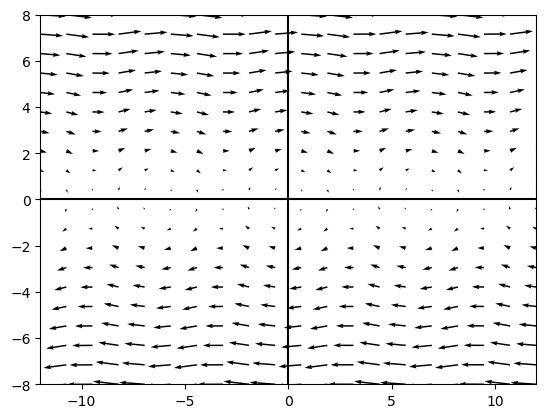

In [5]:
vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8))
plt.show()

## Einige Lösungskurven

Lösungen des obigen Differentialgleichungssystems sind Kurven im $\mathbb{R}^2$, also Abbildungen der Form $I \to \mathbb{R}^2$ für ein Intervall $I$. Die folgende Abbildung zeigt die **Bilder** einiger dieser Kurven.

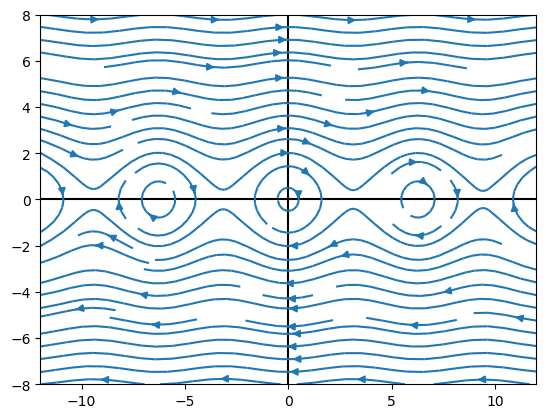

In [6]:
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8))
plt.show()

Die Lösungskurven sind tangential zum Vektorfeld.

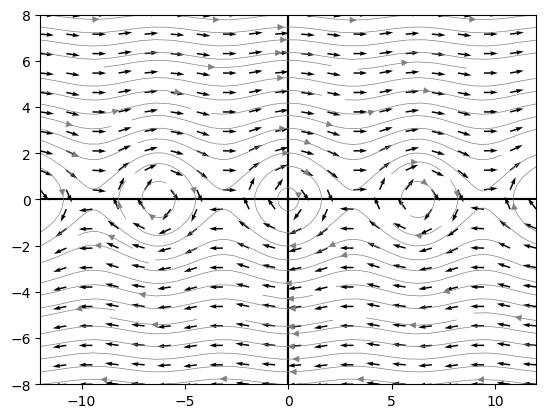

In [7]:
ax = vector_fields.plot_vector_field(f/vector_fields.norm(f),(x,-12,12),(y,-8,8),color="black")
vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=ax,color="grey",linewidth=0.5)
plt.show()

## Eine spezielle Lösung

Wir bestimmen nun numerisch eine Lösung der Differentialgleichung für die $x(0)=2.2, y(0)=0$ gilt.

Das Bild der Lösungskurve stellen wir nun zusammen mit dem Vektorfeld dar.

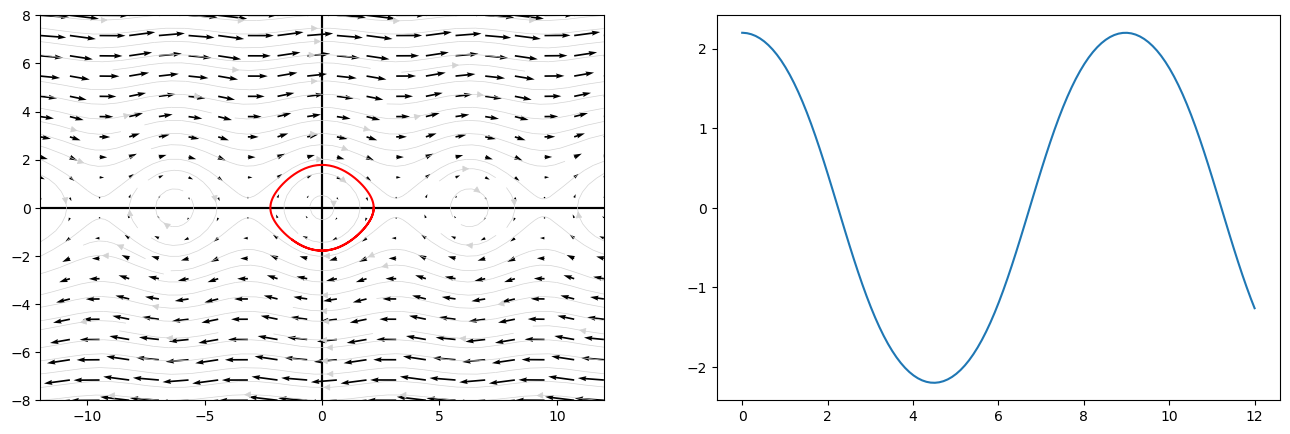

In [8]:
def plot_solution(f, initial_value, t_1=12):
    solution = vector_fields.solve_ivp(f,(x,y),(0,t_1),initial_value)
    fig = plt.figure()
    axis = fig.subplots(1,2)
    vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8),ax=axis[0],color="black")
    vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=axis[0],color="lightgrey",linewidth=0.5)
    axis[0].plot(solution.y[0,:],solution.y[1,:],color="red")
    axis[1].plot(solution.t,solution.y[0,:])
    fig.set_figwidth(16)
    fig.set_figheight(5)
    return fig

plot_solution(f, (2.2,0))
plt.show()

Wir können die Lösung auch animieren:

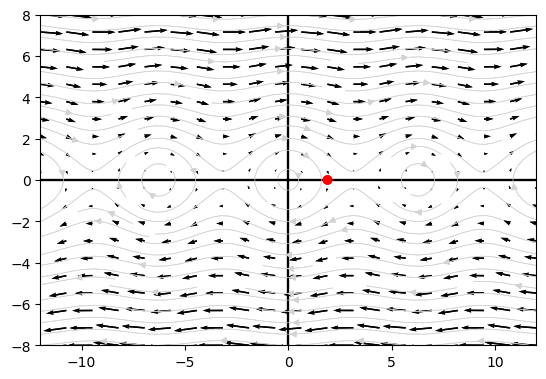

In [9]:
fig = plt.figure()
fig.set_dpi(100)
#fig.set_size_inches(7, 6.5)
t_1=30
initial_value=(1.9,0)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.2, color="red",zorder=10)
solution = vector_fields.solve_ivp(f,(x,y),(0,t_1),initial_value)
ax.set_aspect("equal")
def init():
    vector_fields.plot_vector_field(f,(x,-12,12),(y,-8,8),ax=ax,color="black")
    vector_fields.plot_streamlines(f,(x,-12,12),(y,-8,8),ax=ax,color="lightgrey",linewidth=0.5)
    patch.center = (solution.y[0,0], solution.y[1,0])
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (solution.y[0,i], solution.y[1,i])
    return patch,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=300, 
                               interval=20,
                               blit=True)

plt.show()


In [10]:
# Uncomment the next line to produce the animation, this takes some time 
# anim.save("animation.mp4")


In [11]:
Video("animation.mp4")

Wir können auch viele Lösungen parallel animieren (das läuft als Shader auf der GPU dank Fieldplay, https://anvaka.github.io/fieldplay/)

In [12]:
vector_fields.field_player(f)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

## Linearisierung

Die Taylorentwicklung von $\sin(x)$ in $0$ ergibt sich wie folgt:

In [13]:
sympy.series(sin(x),x,0,10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

Für kleine Auslenkungen $x$ können wir unsere Differentialgleichung also approximieren durch $\ddot x = -kx$,
oder als System ausgedrückt, 
\begin{align*}\dot x &= y,\\ \dot y &= -kx.\end{align*}
Dieses System nennt man auch den *harmonischen Oszillator*.

Für kleine Auslenkungen sind die Lösungen noch sehr ähnlich:

In [14]:
g = sympy.Matrix([y,-k*x])

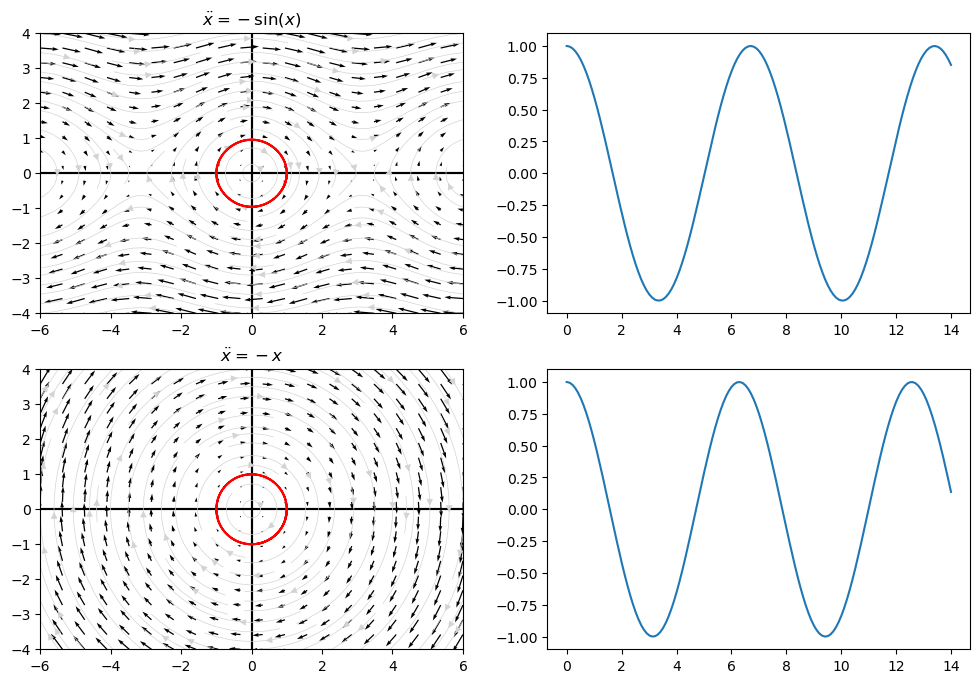

In [15]:
def plot_solution_with_approximation(initial_value, approximation):
    fig = plt.figure()
    axis = fig.subplots(2,2)
    solution = vector_fields.solve_ivp(f,(x,y),(0,14),initial_value)
    linearized_solution = vector_fields.solve_ivp(approximation,(x,y),(0,14),initial_value)

    vector_fields.plot_vector_field(f,(x,-6,6),(y,-4,4),ax=axis[0,0],color="black")
    vector_fields.plot_streamlines(f,(x,-6,6),(y,-4,4),ax=axis[0,0],color="lightgrey",linewidth=0.5)
    axis[0,0].plot(solution.y[0,:],solution.y[1,:],color="red")
    axis[0,0].set_title("$\ddot x = - \sin(x)$")
    axis[0,1].plot(solution.t,solution.y[0,:])

    vector_fields.plot_vector_field(approximation,(x,-6,6),(y,-4,4),ax=axis[1,0],color="black")
    vector_fields.plot_streamlines(approximation,(x,-6,6),(y,-4,4),ax=axis[1,0],color="lightgrey",linewidth=0.5)
    axis[1,0].plot(linearized_solution.y[0,:],linearized_solution.y[1,:],color="red")
    axis[1,0].set_title(f"$\ddot x = {sympy.latex(approximation[1])}$")
    axis[1,1].plot(linearized_solution.t,linearized_solution.y[0,:])

    fig.set_figwidth(12)
    fig.set_figheight(8)
    return fig

plot_solution_with_approximation((1,0),g)
plt.show()


Für größere Auslenkungen sind die Lösungen deutlich verschieden:

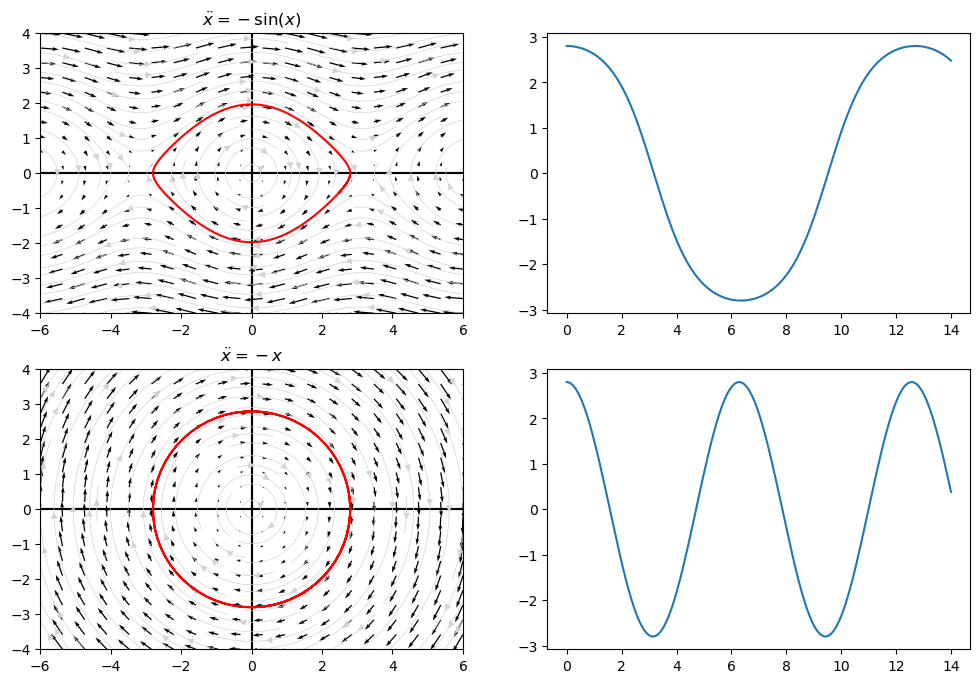

In [16]:
plot_solution_with_approximation((2.8,0),g)
plt.show()


## Approximationen

Nimmt man eine bessere Approximation der Sinusfunktion in $0$, dann ähneln sich die Lösungen auch für größere Auslenkungen.

In [17]:
sin_approx = sympy.series(sin(x),x,0,10).removeO()

In [18]:
h = sympy.Matrix([y,-k*sin_approx])

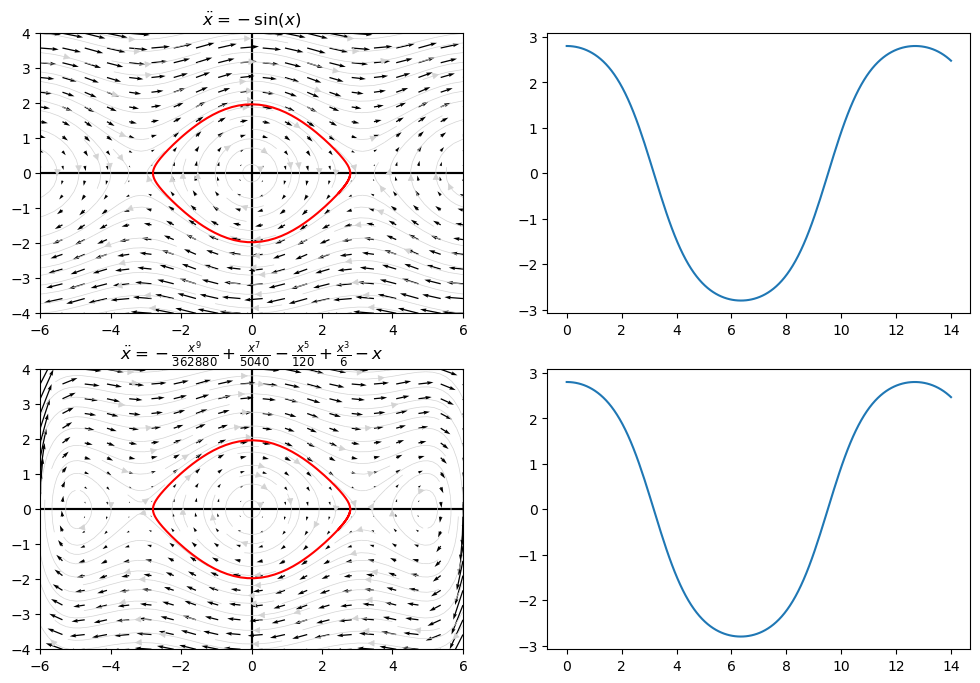

In [19]:
plot_solution_with_approximation((2.8,0),h)
plt.show()

## Reibung

Eine Möglichkeit, die Reibung zu berücksichtigen, ist folgende Differentialgleichung:
\begin{align*}\ddot x = -k\sin(x)-c\dot{x}.\end{align*}.

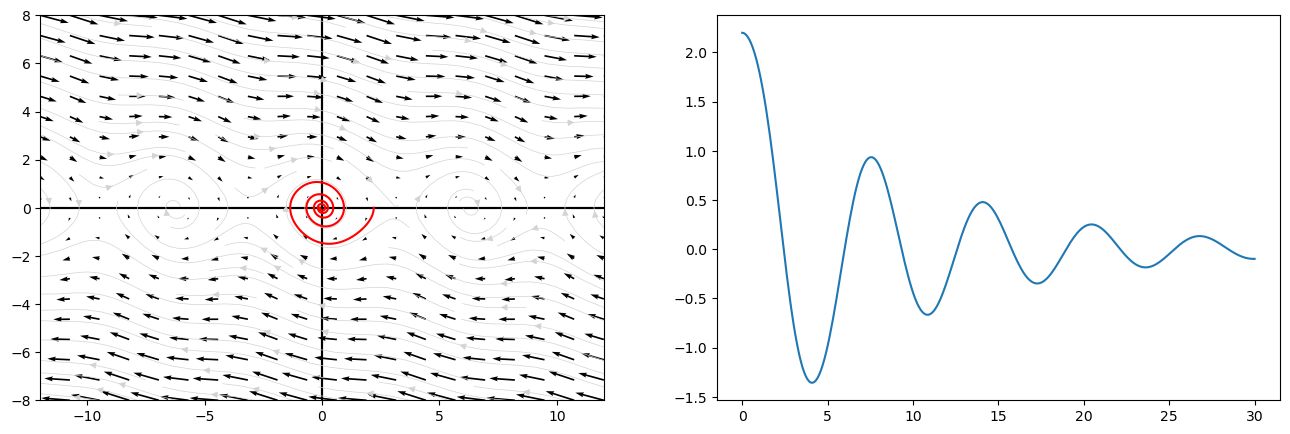

In [20]:
k = 1
c = 0.2
f2 = sympy.Matrix([y,-k*sin(x) - c*y])
plot_solution(f2,(2.2,0),30)
plt.show()

## Periodische Anregung

Fügt man jetzt noch eine periodische Anregung hinzu, erhält man z.B. folgende nicht-autonome Differentialgleichung

\begin{align*}\ddot x = -k\sin(x)-c\dot x+d \sin(t).\end{align*}

deren Lösungen deutlich wilder aussehen können.

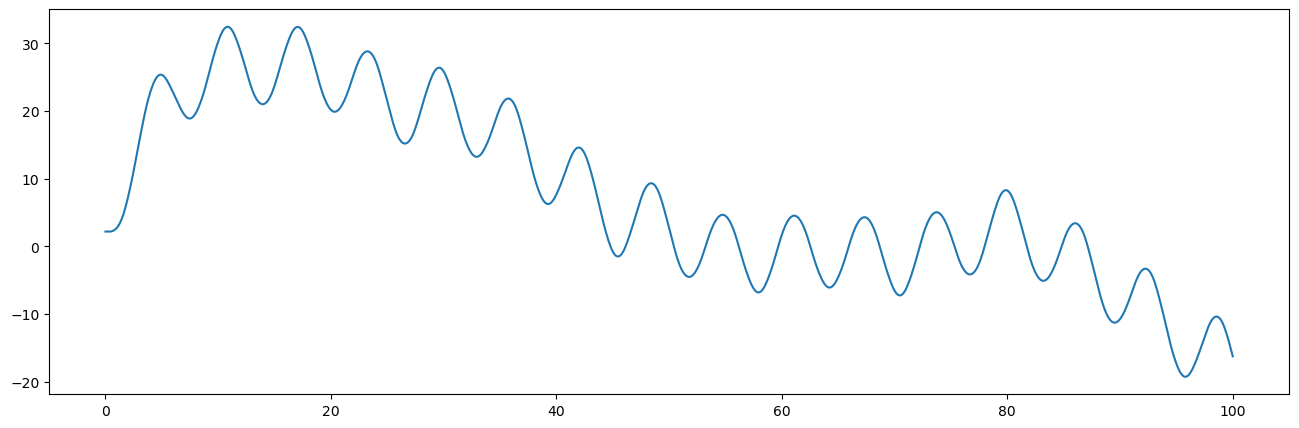

In [22]:
k = 1
c = 0.2
d = 6
f3 = sympy.Matrix([y,-k*sin(x)-c*y+d*sin(t)])
initial_value=(2.2,0)
time = 100
vector_fields.plot_solution_non_autonomous(f3,t,(x,y),initial_value,time)
plt.show()